In [488]:
from keras.datasets import mnist
import matplotlib as plt
import numpy as np
from random import *
import math

In [489]:
numero_elementos_layer_1=258
numero_elementos_layer_2=64
numero_elementos_layer_3=10

In [647]:
(x_train, y_train), (x_test, y_test),  = mnist.load_data()
x_train=x_train/255


x_val, x_test = np.split(x_test, 2)
y_val, y_test = np.split(y_test, 2)

# for ye in range(784):
#         layer_y=np.append(layer_y,np.array([0,0,0,0,0,0,0,0,0,1]), axis=0)
# yi=0
# for ye in y_train:
#       layer_y[yi][ye]
# x_train

In [648]:
yi=0
arr_y = np.empty((0,10), int)
zeros=np.array([[0,0,0,0,0,0,0,0,0,0]])
for ye in range(len(y_train)):
    arr_y=np.append(arr_y,zeros, axis=0)
    arr_y[yi][y_train[ye]]=1
    yi+=1
arr_y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [649]:
yi_val=0
arr_y_val = np.empty((0,10), int)
zeros_val=np.array([[0,0,0,0,0,0,0,0,0,0]])
for ye_val in range(len(y_val)):
    arr_y_val=np.append(arr_y_val,zeros_val, axis=0)
    arr_y_val[yi_val][y_val[ye_val]]=1
    yi_val+=1
arr_y_val

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [792]:
yi_test=0
arr_y_test = np.empty((0,10), int)
zeros_test=np.array([[0,0,0,0,0,0,0,0,0,0]])
for ye_test in range(len(y_test)):
    arr_y_test=np.append(arr_y_test,zeros_test, axis=0)
    arr_y_test[yi_test][y_test[ye_test]]=1
    yi_test+=1
arr_y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [793]:
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train_n=len(x_train[0][0])
x_val=x_val/255
x_val = x_val.reshape(x_val.shape[0], 1, 28*28)
x_test=x_test/255
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)


In [679]:
def relu(z):
    return max(0, z)

def relu_prime(z):
    return 1 if z > 0 else 0


def elu(z,alpha):
    return z if z >= 0 else alpha*(e*z -1)
def elu_prime(z,alpha):
    return 1 if z > 0 else alpha*np.exp(z)
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))
def criar_vetor_random(n):
    return np.random.rand(n)
def criar_layer(n, n_arrays):
    layer=np.array([])
    for y in range(n_arrays):
        layer=np.append(layer,criar_vetor_random(n), axis=0)
    return layer.reshape(n_arrays, n)
def roda(w,a,b):

    n=np.array([])
    bi=0
    for j in w:
        n=np.append(n, np.dot(j,a)+b[bi])
        bi+=1
    return n
def roda_sigmoid(v):
    g=0
    v_6=np.array([])
    while(g<len(v)):
        v_6=np.append(v_6,sigmoid(v[g]))
        g+=1
    return v_6
def roda_relu(v):
    f=0
    v_4=np.array([])
    while(f<len(v)):
        v_4=np.append(v_4,relu(v[f]))
        f+=1
    return v_4
def roda_elu(v):
    f=0
    v_4=np.array([])
    while(f<len(v)):
        v_4=np.append(v_4,relu(v[f]))
        f+=1
    return v_4
def custo(k,y):
    cost3=0
    for i_e in range(len(k)):
        cost3+=(k[i_e]-y[i_e])**2
    return cost3/len(k)
def derivada_sigmoid(x):
    g=0
    v_2=np.array([])
    while(g<len(x)):
        v_2=np.append(v_2,(sigmoid(x[g])*(1-sigmoid(x[g]))))
        g+=1
    return v_2
def derivada_elu(x):
    p=0
    v_2=np.array([])
    while(p<len(x)):
        v_2=np.append(v_2,elu_prime(0.2,x[p]))
        p+=1
    return v_2
def derivada_relu(x):
    p=0
    v_2=np.array([])
    while(p<len(x)):
        v_2=np.append(v_2,relu_prime(x[p]))
        p+=1
    return v_2


In [680]:
# w_1=criar_layer(len(x_train[0][0]),numero_elementos_layer_1 )
# b_1=criar_vetor_random(numero_elementos_layer_1)
w_1=np.random.randn(numero_elementos_layer_1, len(x_train[0][0]))*np.sqrt(1/(len(x_train[0][0])))
b_1=np.random.rand(numero_elementos_layer_1)*np.sqrt(1/(len(x_train[0][0])))
print(b_1.shape)

(258,)


In [681]:
# w_2=criar_layer(numero_elementos_layer_1,numero_elementos_layer_2 )
# b_2=criar_vetor_random(numero_elementos_layer_2)
w_2=np.random.randn(numero_elementos_layer_2, numero_elementos_layer_1)*np.sqrt(1/numero_elementos_layer_1)
b_2=np.random.rand(numero_elementos_layer_2)*np.sqrt(1/(numero_elementos_layer_1))

In [682]:
w_3=np.random.randn(numero_elementos_layer_3, numero_elementos_layer_2)*np.sqrt(1/numero_elementos_layer_2)
b_3=np.random.rand(numero_elementos_layer_3)*np.sqrt(1/(numero_elementos_layer_2))
print(w_3.shape)
print(b_3.shape)

(10, 64)
(10,)


In [683]:
l_r=0.3

In [684]:
# def back2(img_entregue, img_arr_y, v_u,v_h,v_k,d_u, d_h,d_k, imagem_original,w_1_2,w_2_2,w_3_2):
#     e_3=np.dot(np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k))[np.newaxis].T,d_h[np.newaxis])
# #     e_2=np.dot(np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h))[np.newaxis].T,d_u[np.newaxis])
#     e_2=np.dot(w_3_2.T, np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k)[np.newaxis].T).T,v_h[np.newaxis])
#     e_1=np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T, np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T).T, derivada_sigmoid(v_u)).T,imagem_original[np.newaxis])
#     b_c_3=np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k)).T
#     b_c_2=np.multiply(np.dot(w_3_2.T, np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h))
#     b_c_1=np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3.T, np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T).T, derivada_sigmoid(v_u))
#     return e_1, e_2, e_3,np.squeeze(np.asarray(b_c_1)),np.squeeze(np.asarray(b_c_2)),np.squeeze(np.asarray(b_c_3))


In [685]:
def back3(img_entregue, img_arr_y, v_u,v_h,v_k,d_u, d_h,d_k, imagem_original,w_1_2,w_2_2,w_3_2):
    q_3=np.dot(np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1)),d_h.reshape((1,64)))
    d_3=np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k)).reshape((10,1))
    q_2=np.dot(np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_elu(np.dot(w_2_2,d_u)).reshape((64,1))),d_u.reshape((1,258)))
    d_2=np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_elu(np.dot(w_2_2,d_u)).reshape((64,1)))
    q_1=np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_elu(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_elu(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1))),imagem_original.reshape((1,784)))
    d_1=np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_elu(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_elu(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1)))
    return q_1,q_2,q_3,d_1,d_2,d_3



In [686]:
def back4(img_entregue, img_arr_y, v_u,v_h,v_k,d_u, d_h,d_k, imagem_original,w_1_2,w_2_2,w_3_2):
    q_3=np.dot(np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1)),d_h.reshape((1,64)))
    d_3=np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k)).reshape((10,1))
    q_2=np.dot(np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_relu(np.dot(w_2_2,d_u)).reshape((64,1))),d_u.reshape((1,258)))
    d_2=np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_relu(np.dot(w_2_2,d_u)).reshape((64,1)))
    q_1=np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_relu(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_relu(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1))),imagem_original.reshape((1,784)))
    d_1=np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_relu(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_relu(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1)))
    return q_1,q_2,q_3,d_1,d_2,d_3

In [687]:
def back2(img_entregue, img_arr_y, v_u,v_h,v_k,d_u, d_h,d_k, imagem_original,w_1_2,w_2_2,w_3_2):
    q_3=np.dot(np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1)),d_h.reshape((1,64)))
    d_3=np.multiply(img_entregue-img_arr_y,derivada_sigmoid(v_k)).reshape((10,1))
    q_2=np.dot(np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_sigmoid(np.dot(w_2_2,d_u)).reshape((64,1))),d_u.reshape((1,258)))
    d_2=np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_sigmoid(np.dot(w_2_2,d_u)).reshape((64,1)))
    q_1=np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_sigmoid(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_sigmoid(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1))),imagem_original.reshape((1,784)))
    print(q_3)
    d_1=np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T,np.multiply(img_entregue-img_arr_y,derivada_sigmoid(np.dot(w_3_2,d_h))).reshape((10,1))),derivada_sigmoid(np.dot(w_2_2,d_u)).reshape((64,1)))).reshape((258,1)),derivada_sigmoid(np.dot(w_1_2, imagem_original.reshape((784,1)))).reshape((258,1)))
    return q_1,q_2,q_3,d_1,d_2,d_3



In [688]:
def foward4 (img0,w_e_1,w_e_2,w_e_3,b_e_1, b_e_2, b_e_3):
    u=roda(w_e_1,img0, b_e_1)
    u_s=roda_relu(u)
    h=roda(w_e_2,u_s, b_e_2)
    h_s=roda_relu(h)
    k=roda(w_e_3,h_s,b_e_3)
    k_s=roda_sigmoid(k)
    return u,h,k,u_s,h_s,k_s

In [689]:
def foward3 (img0,w_e_1,w_e_2,w_e_3,b_e_1, b_e_2, b_e_3):
    u=roda(w_e_1,img0, b_e_1)
    u_s=roda_elu(u)
    h=roda(w_e_2,u_s, b_e_2)
    h_s=roda_elu(h)
    k=roda(w_e_3,h_s,b_e_3)
    k_s=roda_sigmoid(k)
    return u,h,k,u_s,h_s,k_s

In [690]:
def foward2 (img0,w_e_1,w_e_2,w_e_3,b_e_1, b_e_2, b_e_3):
    u=roda(w_e_1,img0, b_e_1)
    u_s=roda_sigmoid(u)
    h=roda(w_e_2,u_s, b_e_2)
    h_s=roda_sigmoid(h)
    k=roda(w_e_3,h_s,b_e_3)
    k_s=roda_sigmoid(k)
    return u,h,k,u_s,h_s,k_s

In [691]:
def roda_nn2(batch_p, arr_y,w_1,w_2,w_3, b_1,b_2,b_3,learning_rate, n_epoch, n_batch):
    total_results_back={}
    total_results_back["W_1"]=w_1
    total_results_back["W_2"]=w_2
    total_results_back["W_3"]=w_3
    total_results_back["B_1"]=b_1.reshape(258,1)
    total_results_back["B_2"]=b_2.reshape(64,1)
    total_results_back["B_3"]=b_3.reshape(10,1)
    t=0

    for l in range(n_epoch): 
        c=0
        for i in np.arange(n_batch,len(batch_p),n_batch):
            cost1=0
            for k in range(n_batch):
                if k%n_batch==0:
                    results_foward=foward2(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    print(results_foward[5])
                    results_back=back2(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=results_back[0]   
                    D_W_2=results_back[1]
                    D_W_3=results_back[2]
                    D_B_1=results_back[3]   
                    D_B_2=results_back[4]
                    D_B_3=results_back[5]
                    cost1=custo(results_foward[5],arr_y[k])
                else:

                    results_foward=foward2(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back2(results_foward[5],arr_y[k],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=D_W_1+results_back[0]   
                    D_W_2=D_W_2+results_back[1]
                    D_W_3=D_W_3+results_back[2]
                    D_B_1=D_B_1+results_back[3]   
                    D_B_2=D_B_2+results_back[4]
                    D_B_3=D_B_3+results_back[5]
                    cost1+=custo(results_foward[5],arr_y[k])
                c+=1
                print(c)
            total_results_back["W_1"]=total_results_back["W_1"]-learning_rate*D_W_1
            total_results_back["W_2"]=total_results_back["W_2"]-learning_rate*D_W_2
            total_results_back["W_3"]=total_results_back["W_3"]-learning_rate*D_W_3
            total_results_back["B_1"]=total_results_back["B_1"]-learning_rate*D_B_1
            total_results_back["B_2"]=total_results_back["B_2"]-learning_rate*D_B_2
            total_results_back["B_3"]=total_results_back["B_3"]-learning_rate*D_B_3
            t+=1
            print("batch {0} ".format(t)+"de {0}".format((len(batch_p)/n_batch)*n_epoch))   
            print(cost1/n_batch)
    return total_results_back["W_1"], total_results_back["W_2"], total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"], total_results_back["B_3"]
                

In [746]:
def roda_nn4(batch_p, arr_y,w_1,w_2,w_3, b_1,b_2,b_3,learning_rate, n_epoch, n_batch):
    total_results_back={}
    total_results_back["W_1"]=w_1
    total_results_back["W_2"]=w_2
    total_results_back["W_3"]=w_3
    total_results_back["B_1"]=b_1.reshape(258,1)
    total_results_back["B_2"]=b_2.reshape(64,1)
    total_results_back["B_3"]=b_3.reshape(10,1)
    t=0
    for l in range(n_epoch):   
        c=0
        for i in np.arange(0,len(batch_p),n_batch):
            cost1=0
            for r in range(n_batch):
               
                if (c)%n_batch==0:
                    
                    results_foward=foward4(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back4(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=results_back[0]   
                    D_W_2=results_back[1]
                    D_W_3=results_back[2]
                    D_B_1=results_back[3]   
                    D_B_2=results_back[4]
                    D_B_3=results_back[5]
                    cost1=custo(results_foward[5],arr_y[c])
                else:

                    results_foward=foward4(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back4(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=D_W_1+results_back[0]   
                    D_W_2=D_W_2+results_back[1]
                    D_W_3=D_W_3+results_back[2]
                    D_B_1=D_B_1+results_back[3]   
                    D_B_2=D_B_2+results_back[4]
                    D_B_3=D_B_3+results_back[5]
                    cost1+=custo(results_foward[5],arr_y[c])
                c+=1
            total_results_back["W_1"]=total_results_back["W_1"]-learning_rate*D_W_1
            total_results_back["W_2"]=total_results_back["W_2"]-learning_rate*D_W_2
            total_results_back["W_3"]=total_results_back["W_3"]-learning_rate*D_W_3
            total_results_back["B_1"]=total_results_back["B_1"]-learning_rate*D_B_1
            total_results_back["B_2"]=total_results_back["B_2"]-learning_rate*D_B_2
            total_results_back["B_3"]=total_results_back["B_3"]-learning_rate*D_B_3
            t+=1
            print("batch {0} ".format(t)+"de {0}".format((len(batch_p)/n_batch)*n_epoch))   
            print(cost1/n_batch)
    return total_results_back["W_1"], total_results_back["W_2"], total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"], total_results_back["B_3"]
                

In [776]:
def roda_nn3(batch_p, arr_y,x_val,y_val,w_1,w_2,w_3, b_1,b_2,b_3,learning_rate, n_epoch, n_batch):
    erro_treino=np.array([])
    erro_validacao=np.array([])
    total_results_back={}
    total_results_back["W_1"]=w_1
    total_results_back["W_2"]=w_2
    total_results_back["W_3"]=w_3
    total_results_back["B_1"]=b_1.reshape(258,1)
    total_results_back["B_2"]=b_2.reshape(64,1)
    total_results_back["B_3"]=b_3.reshape(10,1)
    t=0
    for l in range(n_epoch):   
        c=0
        for i in np.arange(0,len(batch_p),n_batch):
            cost1=0
            cost1_val=0
            for r in range(n_batch):
               
                if (c)%n_batch==0:
                    results_foward=foward3(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back3(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=results_back[0]   
                    D_W_2=results_back[1]
                    D_W_3=results_back[2]
                    D_B_1=results_back[3]   
                    D_B_2=results_back[4]
                    D_B_3=results_back[5]
                    cost1=custo(results_foward[5],arr_y[c])
                else:
                
                    results_foward=foward3(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back3(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=D_W_1+results_back[0]   
                    D_W_2=D_W_2+results_back[1]
                    D_W_3=D_W_3+results_back[2]
                    D_B_1=D_B_1+results_back[3]   
                    D_B_2=D_B_2+results_back[4]
                    D_B_3=D_B_3+results_back[5]
                    cost1+=custo(results_foward[5],arr_y[c])
                c+=1
            erro_treino=np.append(erro_treino, cost1/n_batch)
            for exemplo, resposta in zip(x_val, arr_y_val):
                results_foward_val=foward3(exemplo[0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                cost1_val+=custo(results_foward_val[5],resposta)
            
            erro_validacao=np.append(erro_validacao,cost1_val/len(x_val))
            total_results_back["W_1"]=total_results_back["W_1"]-learning_rate*D_W_1
            total_results_back["W_2"]=total_results_back["W_2"]-learning_rate*D_W_2
            
            total_results_back["W_3"]=total_results_back["W_3"]-learning_rate*D_W_3
            total_results_back["B_1"]=total_results_back["B_1"]-learning_rate*D_B_1
            total_results_back["B_2"]=total_results_back["B_2"]-learning_rate*D_B_2
            total_results_back["B_3"]=total_results_back["B_3"]-learning_rate*D_B_3
            t+=1
            print("batch {0} ".format(t)+"de {0}".format((len(batch_p)/n_batch)*n_epoch)) 
            print(cost1/n_batch)
            
    return total_results_back["W_1"], total_results_back["W_2"], total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"], total_results_back["B_3"], erro_treino, erro_validacao
                

In [767]:
w_e_1, w_e_2, w_e_3, b_e_1, b_e_2,b_e_3,train_cost,val_cost =roda_nn3(x_train, arr_y, x_val,y_val,w_1, w_2,w_3,b_1,b_2,b_3, 0.005,3,100)                                                           
                                                

(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0

(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0

(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[1 0 0 0 0 0 0

(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 1 0 0

(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0

[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0

(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1

(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 1 0 0 0 0 0

(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0

(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1

(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 1 0

(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0

(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 1 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 1 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0

(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 1 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 1 0 0 0]
(10,)
[1 0 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 1 0 0 0 0 0 0 0 0]
(10,)
[0 0 0 1 0 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 0 0 0 1 0 0]
(10,)
[0 0 0 0 1 0 0 0 0 0]
(10,)
[0 0 0 0 0 0 0 0 0 1]
(10,)
[0 0 0 0 0 1 0

KeyboardInterrupt: 

In [ ]:
a,b,c,d,e,f,g,h=w_e_1, w_e_2, w_e_3, b_e_1, b_e_2,b_e_3, train_cost, val_cost

In [ ]:
# posicao=0
# imagem1=x_train[0]
# lista_layers_neuronios=[256,64,10]
# lista_numero_sigmoid=[50,1500,100]

# def neural_network(imagem, posicao):
#         if(posicao==0):
#             pesos=criar_layer(len(imagem),lista_layers_neuronios[0])
#             k=roda(pesos,imagem1,lista_numero_sigmoid[0])
#             print(posicao)
#             posicao+=1
#             return neural_network(k,posicao)
#         elif(posicao==len(lista_layers_neuronios)-1):
#             pesos=criar_layer(lista_layers_neuronios[posicao-1],lista_layers_neuronios[posicao])
#             k=roda(pesos,imagem,lista_numero_sigmoid[len(lista_numero_sigmoid)-1])
#             print(posicao)
#             return k
#         else:
#             pesos=criar_layer(lista_layers_neuronios[posicao-1],lista_layers_neuronios[posicao])
#             k=roda(pesos,imagem,lista_numero_sigmoid[posicao])
#             print(posicao)
#             posicao+=1
#             return neural_network(k,posicao)

In [669]:
# def foward(batch,arr_y,w_1, w_2,w_3, b_x_1, b_x_2, b_x_3 ):
#     batch_p=np.array([])
#     VQV=0
#     c=0
#     for el, ei in zip(batch, arr_y):
#         u=roda(w_1,el[0], b_x_1)
#         u_s=roda_sigmoid(u)
#         h=roda(w_2,u_s, b_x_2)
#         h_s=roda_sigmoid(h)
#         k=roda(w_3,h_s,b_x_3)
#         k_s=roda_sigmoid(k)
#         batch_p=np.append(batch_p,k_s)
#         VQV+=custo(k_s,ei)
#         c+=1
        
#     print(VQV/c)
#     return u,h,k,u_s, h_s, k_s, batch_p.reshape(len(batch),10)
 

In [670]:
q=0
e=0
for x,y in zip(x_train,arr_y):
    if foward2(x[0],w_e_1, w_e_2, w_e_3, b_e_1, b_e_2,b_e_3)[5].argmax()==y.argmax():
        q+=1
    e+=1
    print(q/e*100)
    
    

0.0
0.0
0.0
25.0
20.0
33.33333333333333
42.857142857142854
37.5
44.44444444444444
40.0
36.36363636363637
33.33333333333333
30.76923076923077
28.57142857142857
33.33333333333333
37.5
41.17647058823529
38.88888888888889
36.84210526315789
35.0
33.33333333333333
31.818181818181817
30.434782608695656
33.33333333333333
36.0
38.46153846153847
37.03703703703704
39.285714285714285
41.37931034482759
40.0
38.70967741935484
37.5
36.36363636363637
35.294117647058826
34.285714285714285
33.33333333333333
32.432432432432435
31.57894736842105
30.76923076923077
30.0
31.70731707317073
30.952380952380953
30.23255813953488
29.545454545454547
28.888888888888886
28.26086956521739
27.659574468085108
29.166666666666668
28.57142857142857
28.000000000000004
27.450980392156865
26.923076923076923
28.30188679245283
27.77777777777778
27.27272727272727
26.785714285714285
28.07017543859649
27.586206896551722
27.11864406779661
28.333333333333332
27.86885245901639
27.419354838709676
26.984126984126984
26.5625
26.1538461

30.29045643153527
30.22774327122153
30.37190082644628
30.515463917525775
30.45267489711934
30.390143737166326
30.327868852459016
30.265848670756647
30.20408163265306
30.14256619144603
30.284552845528456
30.425963488843816
30.5668016194332
30.50505050505051
30.443548387096776
30.38229376257545
30.32128514056225
30.26052104208417
30.2
30.13972055888224
30.0796812749004
30.019880715705767
29.96031746031746
30.099009900990097
30.237154150197625
30.17751479289941
30.314960629921263
30.451866404715126
30.392156862745097
30.528375733855185
30.46875
30.60428849902534
30.739299610894943
30.679611650485437
30.813953488372093
30.947775628626694
30.888030888030887
30.828516377649322
30.76923076923077
30.710172744721685
30.842911877394634
30.975143403441685
30.916030534351147
30.857142857142854
30.798479087452474
30.740037950664135
30.681818181818183
30.623818525519848
30.566037735849054
30.69679849340866
30.639097744360903
30.58161350844278
30.711610486891384
30.654205607476637
30.783582089552237


29.291845493562228
29.260450160771708
29.229122055674516
29.3048128342246
29.273504273504276
29.242262540021347
29.21108742004264
29.179978700745473
29.148936170212764
29.11795961742827
29.1932059447983
29.268292682926827
29.23728813559322
29.20634920634921
29.175475687103592
29.14466737064414
29.11392405063291
29.083245521601686
29.05263157894737
29.12723449001052


KeyboardInterrupt: 

In [ ]:
# def roda_nn(batch_p, arr_y,w_1,w_2,w_3, b_1,b_2,b_3,learning_rate, n_epoch, n_batch):
#     t=0
#     o=0
#     total_results_back={}
#     total_results_back["W_1"]=w_1
#     total_results_back["W_2"]=w_2
#     total_results_back["W_3"]=w_3  
#     total_results_back["B_1"]=b_1
#     total_results_back["B_2"]=b_2
#     total_results_back["B_3"]=b_3
#     results_foward={}
#     results_back={}
#     for l in range(n_epoch):
#         for i in range(n_batch-1,len(batch_p),n_batch):
#             if i == n_batch-1:
#                 results_foward[o]=foward(batch_p[0:n_batch],arr_y[0:n_batch],w_1,w_2,w_3,b_1,b_2,b_3)
#                 results_back[o]=back(batch_p[0:n_batch],arr_y[0:n_batch],results_foward[o][0],results_foward[o][1],results_foward[o][2],results_foward[o][3],results_foward[o][4],results_foward[o][5],results_foward[o][6],w_1,w_2,w_3, learning_rate) 
#                 total_results_back["W_1"]+=results_back[o][0]
#                 total_results_back["W_2"]+=results_back[o][1]
#                 total_results_back["W_3"]+=results_back[o][2]
#                 total_results_back["B_1"]+=results_back[o][3]
#                 total_results_back["B_2"]+=results_back[o][4]
#                 total_results_back["B_3"]+=results_back[o][5]
#                 o+=1
            
#             else:
                
#                 results_foward[o]=foward(batch_p[i-n_batch:i],arr_y[i-n_batch:i],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
#                 results_back[o]=back(batch_p[i-n_batch:i],arr_y[i-n_batch:i],results_foward[o][0],results_foward[o][1],results_foward[o][2],results_foward[o][3],results_foward[o][4],results_foward[o][5],results_foward[o][6],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"], learning_rate)
#                 total_results_back["W_1"]+=results_back[o][0]
#                 total_results_back["W_2"]+=results_back[o][1]
#                 total_results_back["W_3"]+=results_back[o][2]
#                 total_results_back["B_1"]+=results_back[o][3]
#                 total_results_back["B_2"]+=results_back[o][4]
#                 total_results_back["B_3"]+=results_back[o][5]
#                 o+=1
#             t+=1 
#             print("batch {0} ".format(t)+"de {0}".format((len(batch_p)/n_batch)*n_epoch))              
#     return total_results_back["W_1"], total_results_back["W_2"], total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"], total_results_back["B_3"]
                

In [ ]:
# def back(batch_0, arr_y, v_u,v_h,v_k,d_u, d_h,d_k, batch_p,w_1_2,w_2_2,w_3_2, learning_rate):  
#     c=0
#     for zero, ie, ei in zip(batch_0,batch_p, arr_y):
#         if c==0:
#             e_3=-learning_rate*np.dot(np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T,d_h[np.newaxis])
#             e_2=-learning_rate*np.dot(np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T,d_u[np.newaxis])
#             e_1=-learning_rate*np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T).T, derivada_sigmoid(v_u)).T,zero)
#             b_c_3=-learning_rate*np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis]
#             b_c_2=-learning_rate*np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis].T).T, derivada_sigmoid(h))
#             b_c_1=-learning_rate*np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis].T).T, derivada_sigmoid(h)).T).T, derivada_sigmoid(u))
#             c+=1 
#         else:
#             e_3-=learning_rate*np.dot(np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T,d_h[np.newaxis])
#             e_2-=learning_rate*np.dot(np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T,d_u[np.newaxis])
#             e_1-=learning_rate*np.dot(np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(v_k))[np.newaxis].T).T, derivada_sigmoid(v_h)).T).T, derivada_sigmoid(v_u)).T,zero)
#             b_c_3-=learning_rate*np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis]
#             b_c_2-=learning_rate*np.multiply(np.dot(w_3_2.T, np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis].T).T, derivada_sigmoid(h))
#             b_c_1-=learning_rate*np.multiply(np.dot(w_2_2.T,np.multiply(np.dot(w_3.T, np.multiply(ie-ei,derivada_sigmoid(k))[np.newaxis].T).T, derivada_sigmoid(h)).T).T, derivada_sigmoid(u))
#             c+=1
#             np.squeeze(np.asarray(b_c_1/c))
#     return e_1/c, e_2/c, e_3/c,np.squeeze(np.asarray(b_c_1/c)),np.squeeze(np.asarray(b_c_2/c)),np.squeeze(np.asarray(b_c_3/c))


In [ ]:
foward2(x_train[355][0],w_e_1, w_e_2, w_e_3, b_e_1, b_e_2,b_e_3)[5].argmax()

In [ ]:
arr_y[355].argmax()

In [671]:
def roda_nn6(batch_p, arr_y,w_1,w_2,w_3, b_1,b_2,b_3,learning_rate, n_epoch, n_batch):
    total_results_back={}
    total_results_back["W_1"]=w_1
    total_results_back["W_2"]=w_2
    total_results_back["W_3"]=w_3
    total_results_back["B_1"]=b_1.reshape(258,1)
    total_results_back["B_2"]=b_2.reshape(64,1)
    total_results_back["B_3"]=b_3.reshape(10,1)
    t=0
    for l in range(n_epoch):   
        c=0
        for i in np.arange(0,len(batch_p),n_batch):
            cost1=0
            for r in range(n_batch):
                if (c)%n_batch==0:
                    results_foward=foward3(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back3(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=results_back[0]   
                    D_W_2=results_back[1]
                    D_W_3=results_back[2]
                    D_B_1=results_back[3]   
                    D_B_2=results_back[4]
                    D_B_3=results_back[5]
                    cost1=custo(results_foward[5],arr_y[c])
                else:
                
                    results_foward=foward3(batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"],total_results_back["B_3"])
                    results_back=back3(results_foward[5],arr_y[c],results_foward[0],results_foward[1],results_foward[2],results_foward[3],results_foward[4],results_foward[5],batch_p[c][0],total_results_back["W_1"],total_results_back["W_2"],total_results_back["W_3"])
                    D_W_1=D_W_1+results_back[0]   
                    D_W_2=D_W_2+results_back[1]
                    D_W_3=D_W_3+results_back[2]
                    D_B_1=D_B_1+results_back[3]   
                    D_B_2=D_B_2+results_back[4]
                    D_B_3=D_B_3+results_back[5]
                    cost1+=custo(results_foward[5],arr_y[c])
                c+=1
            
            total_results_back["W_1"]=total_results_back["W_1"]-learning_rate*D_W_1
            total_results_back["W_2"]=total_results_back["W_2"]-learning_rate*D_W_2
            total_results_back["W_3"]=total_results_back["W_3"]-learning_rate*D_W_3
            total_results_back["B_1"]=total_results_back["B_1"]-learning_rate*D_B_1
            total_results_back["B_2"]=total_results_back["B_2"]-learning_rate*D_B_2
            total_results_back["B_3"]=total_results_back["B_3"]-learning_rate*D_B_3
            t+=1
            print("batch {0} ".format(t)+"de {0}".format((len(batch_p)/n_batch)*n_epoch)) 
            print(cost1/n_batch)
            
    return total_results_back["W_1"], total_results_back["W_2"], total_results_back["W_3"],total_results_back["B_1"],total_results_back["B_2"], total_results_back["B_3"]
                

In [672]:
w_e_1, w_e_2, w_e_3, b_e_1, b_e_2,b_e_3 =roda_nn6(x_train[0:300], arr_y[0:300],w_1, w_2,w_3,b_1,b_2,b_3, 0.005,3,100)                                                           


batch 1 de 9.0
0.28115898692507474
batch 2 de 9.0
0.14795213576129135
batch 3 de 9.0
0.09184135577677485
batch 4 de 9.0
0.09125833888088744
batch 5 de 9.0
0.09012810738275853
batch 6 de 9.0
0.08875852260177589
batch 7 de 9.0
0.08936820929929079
batch 8 de 9.0
0.08864693591778428
batch 9 de 9.0
0.08657049587036142


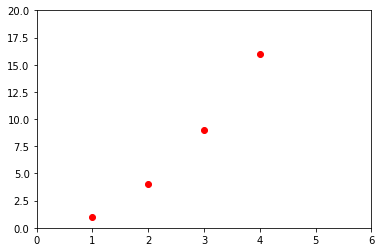

In [702]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [701]:
import matplotlib.pyplot as plt 

In [784]:


w_e_1_2, w_e_2_2, w_e_3_2, b_e_1_2, b_e_2_2,b_e_3_2,train_cost_2,val_cost_2 =roda_nn3(x_train, arr_y, x_val,y_val,w_1, w_2,w_3,b_1,b_2,b_3, 0.005,3,100)  







batch 1 de 1800.0
0.2525075095303047
batch 2 de 1800.0
0.12891385535422864
batch 3 de 1800.0
0.09292937820974043
batch 4 de 1800.0
0.09014307638429848
batch 5 de 1800.0
0.08963715591963282
batch 6 de 1800.0
0.0891103203093198
batch 7 de 1800.0
0.0885959322988456
batch 8 de 1800.0
0.08943052780406777
batch 9 de 1800.0
0.08750543131805846
batch 10 de 1800.0
0.08678896284886103
batch 11 de 1800.0
0.08657952294762104
batch 12 de 1800.0
0.08654457378452347
batch 13 de 1800.0
0.08797898543943436
batch 14 de 1800.0
0.08773153304778795
batch 15 de 1800.0
0.08490725142229928
batch 16 de 1800.0
0.08371938016782256
batch 17 de 1800.0
0.07938221413814767
batch 18 de 1800.0
0.08086249583722906
batch 19 de 1800.0
0.0787734965406219
batch 20 de 1800.0
0.079147155993214
batch 21 de 1800.0
0.07754162180529241
batch 22 de 1800.0
0.07197011772467
batch 23 de 1800.0
0.07442720159706932
batch 24 de 1800.0
0.07393137459994417
batch 25 de 1800.0
0.0715991874803596
batch 26 de 1800.0
0.0698594584887721
batch 

batch 208 de 1800.0
0.021654472750775776
batch 209 de 1800.0
0.01957721464846229
batch 210 de 1800.0
0.030218811874262796
batch 211 de 1800.0
0.02079304791379382
batch 212 de 1800.0
0.01834402535771645
batch 213 de 1800.0
0.011612811614008494
batch 214 de 1800.0
0.023759192526247384
batch 215 de 1800.0
0.01701063371635783
batch 216 de 1800.0
0.020004137789343818
batch 217 de 1800.0
0.017829598818494344
batch 218 de 1800.0
0.01391019633549544
batch 219 de 1800.0
0.011220707173061001
batch 220 de 1800.0
0.015969449413931233
batch 221 de 1800.0
0.015211673924545673
batch 222 de 1800.0
0.02842983526643618
batch 223 de 1800.0
0.024557914340214263
batch 224 de 1800.0
0.012258256181189671
batch 225 de 1800.0
0.024543644450620673
batch 226 de 1800.0
0.037796201852839724
batch 227 de 1800.0
0.02236516270778301
batch 228 de 1800.0
0.020296329647552937
batch 229 de 1800.0
0.016052223561886115
batch 230 de 1800.0
0.012036136013546217
batch 231 de 1800.0
0.01889605991937077
batch 232 de 1800.0
0.01

batch 410 de 1800.0
0.013501168698257454
batch 411 de 1800.0
0.017934296082812173
batch 412 de 1800.0
0.013702043061609952
batch 413 de 1800.0
0.024093567517281204
batch 414 de 1800.0
0.02137605954651005
batch 415 de 1800.0
0.022974369119984246
batch 416 de 1800.0
0.021413766457012852
batch 417 de 1800.0
0.01285682368625525
batch 418 de 1800.0
0.017596536890919855
batch 419 de 1800.0
0.014926146990310338
batch 420 de 1800.0
0.019287302388316045
batch 421 de 1800.0
0.01608678892397118
batch 422 de 1800.0
0.021070871616029958
batch 423 de 1800.0
0.01885521674694519
batch 424 de 1800.0
0.0252090368958428
batch 425 de 1800.0
0.01979963300585881
batch 426 de 1800.0
0.018519310466155323
batch 427 de 1800.0
0.01563490345856848
batch 428 de 1800.0
0.014336359919254842
batch 429 de 1800.0
0.01797353217678011
batch 430 de 1800.0
0.022068131709865463
batch 431 de 1800.0
0.020199403747803504
batch 432 de 1800.0
0.015185057764433033
batch 433 de 1800.0
0.018201907973884185
batch 434 de 1800.0
0.010

batch 612 de 1800.0
0.0196652452378823
batch 613 de 1800.0
0.02230761417625132
batch 614 de 1800.0
0.020402929005084093
batch 615 de 1800.0
0.011030080448772281
batch 616 de 1800.0
0.01668547154040033
batch 617 de 1800.0
0.01001419375408482
batch 618 de 1800.0
0.008974319302726384
batch 619 de 1800.0
0.011731660283999438
batch 620 de 1800.0
0.010940055590280395
batch 621 de 1800.0
0.015888067934663602
batch 622 de 1800.0
0.007376504566965365
batch 623 de 1800.0
0.011248249751877245
batch 624 de 1800.0
0.011273370791348882
batch 625 de 1800.0
0.014208479775575409
batch 626 de 1800.0
0.008327918677032196
batch 627 de 1800.0
0.01308150547705354
batch 628 de 1800.0
0.016086384034069725
batch 629 de 1800.0
0.016499936342746248
batch 630 de 1800.0
0.01353988451771484
batch 631 de 1800.0
0.014393302721967972
batch 632 de 1800.0
0.00857721687108482
batch 633 de 1800.0
0.013787264037583014
batch 634 de 1800.0
0.012589840897646514
batch 635 de 1800.0
0.00831108294706608
batch 636 de 1800.0
0.014

batch 814 de 1800.0
0.014714919713858741
batch 815 de 1800.0
0.010220139220181265
batch 816 de 1800.0
0.015391689810445707
batch 817 de 1800.0
0.012509729263606028
batch 818 de 1800.0
0.008094500366420856
batch 819 de 1800.0
0.007441937659617469
batch 820 de 1800.0
0.011362487010000366
batch 821 de 1800.0
0.009117352437194297
batch 822 de 1800.0
0.019580286861641434
batch 823 de 1800.0
0.018077023614210853
batch 824 de 1800.0
0.0057558515873056436
batch 825 de 1800.0
0.016362420778813287
batch 826 de 1800.0
0.030310638656557646
batch 827 de 1800.0
0.015131659201744491
batch 828 de 1800.0
0.014003283586174205
batch 829 de 1800.0
0.010731598341351426
batch 830 de 1800.0
0.006244279465934728
batch 831 de 1800.0
0.01614314944659734
batch 832 de 1800.0
0.013578000021401217
batch 833 de 1800.0
0.010352186846680676
batch 834 de 1800.0
0.011003710195739501
batch 835 de 1800.0
0.014781933009792757
batch 836 de 1800.0
0.013918109262375735
batch 837 de 1800.0
0.014601250948496786
batch 838 de 180

batch 1015 de 1800.0
0.018752016303038153
batch 1016 de 1800.0
0.0192729944163827
batch 1017 de 1800.0
0.010813191890203638
batch 1018 de 1800.0
0.012098336113438397
batch 1019 de 1800.0
0.012001351800559511
batch 1020 de 1800.0
0.01711432331323069
batch 1021 de 1800.0
0.013524205808823901
batch 1022 de 1800.0
0.01839929895041674
batch 1023 de 1800.0
0.014052879520085701
batch 1024 de 1800.0
0.02118591490945022
batch 1025 de 1800.0
0.017968757358423643
batch 1026 de 1800.0
0.016412452188474543
batch 1027 de 1800.0
0.01094196954257875
batch 1028 de 1800.0
0.013406032026806229
batch 1029 de 1800.0
0.015716536978932886
batch 1030 de 1800.0
0.018292863968425038
batch 1031 de 1800.0
0.015554383670896137
batch 1032 de 1800.0
0.01270256519126582
batch 1033 de 1800.0
0.01578625157211212
batch 1034 de 1800.0
0.007948973308488321
batch 1035 de 1800.0
0.006398593552155143
batch 1036 de 1800.0
0.01483610876134755
batch 1037 de 1800.0
0.011481435344974452
batch 1038 de 1800.0
0.011597639662960178
b

batch 1211 de 1800.0
0.021553285771032583
batch 1212 de 1800.0
0.017902672372523534
batch 1213 de 1800.0
0.019360689235447585
batch 1214 de 1800.0
0.018062100340842907
batch 1215 de 1800.0
0.009311311080303057
batch 1216 de 1800.0
0.01501791220277774
batch 1217 de 1800.0
0.007945031093015382
batch 1218 de 1800.0
0.008104250243358098
batch 1219 de 1800.0
0.009068999580118708
batch 1220 de 1800.0
0.00961496688230004
batch 1221 de 1800.0
0.013789121955154542
batch 1222 de 1800.0
0.005361573208466602
batch 1223 de 1800.0
0.009545073837661532
batch 1224 de 1800.0
0.009690710369648718
batch 1225 de 1800.0
0.012549138885864217
batch 1226 de 1800.0
0.00512719923563754
batch 1227 de 1800.0
0.011875101559580787
batch 1228 de 1800.0
0.014533586876515379
batch 1229 de 1800.0
0.014702780152424887
batch 1230 de 1800.0
0.012102223003231702
batch 1231 de 1800.0
0.012632290044271837
batch 1232 de 1800.0
0.006471000455141974
batch 1233 de 1800.0
0.012741359717254623
batch 1234 de 1800.0
0.01014419750877

batch 1408 de 1800.0
0.01470525527833221
batch 1409 de 1800.0
0.011387653122336878
batch 1410 de 1800.0
0.023446865514810466
batch 1411 de 1800.0
0.01412389018579791
batch 1412 de 1800.0
0.011760346931079612
batch 1413 de 1800.0
0.004844361636164621
batch 1414 de 1800.0
0.013654907578050969
batch 1415 de 1800.0
0.009226219882608428
batch 1416 de 1800.0
0.01501124690327726
batch 1417 de 1800.0
0.011333430369825396
batch 1418 de 1800.0
0.007759256676556504
batch 1419 de 1800.0
0.006104611629560567
batch 1420 de 1800.0
0.010579619059112358
batch 1421 de 1800.0
0.007758077934204416
batch 1422 de 1800.0
0.017659413089214312
batch 1423 de 1800.0
0.015810842663504663
batch 1424 de 1800.0
0.005025139326415387
batch 1425 de 1800.0
0.014700862018384789
batch 1426 de 1800.0
0.02820723976944204
batch 1427 de 1800.0
0.012815239498249009
batch 1428 de 1800.0
0.012377553758500491
batch 1429 de 1800.0
0.009630195950866303
batch 1430 de 1800.0
0.004914458514939072
batch 1431 de 1800.0
0.016098233267758

batch 1604 de 1800.0
0.012944351257815116
batch 1605 de 1800.0
0.009893868776095622
batch 1606 de 1800.0
0.011603971131780088
batch 1607 de 1800.0
0.010528524947752383
batch 1608 de 1800.0
0.010230263311866349
batch 1609 de 1800.0
0.008574900200735215
batch 1610 de 1800.0
0.009834795341438628
batch 1611 de 1800.0
0.014032138111580742
batch 1612 de 1800.0
0.009521626700128526
batch 1613 de 1800.0
0.021104640554159827
batch 1614 de 1800.0
0.016524482032417465
batch 1615 de 1800.0
0.016909141598287335
batch 1616 de 1800.0
0.01808757507637983
batch 1617 de 1800.0
0.010288012860202382
batch 1618 de 1800.0
0.010115095759825204
batch 1619 de 1800.0
0.01062034044713322
batch 1620 de 1800.0
0.016517201323897474
batch 1621 de 1800.0
0.012822846856031434
batch 1622 de 1800.0
0.017970727283916733
batch 1623 de 1800.0
0.012787406847574177
batch 1624 de 1800.0
0.019435356987860464
batch 1625 de 1800.0
0.01786857585310333
batch 1626 de 1800.0
0.01585208618999992
batch 1627 de 1800.0
0.008969567832234

batch 1800 de 1800.0
0.009712538020768744


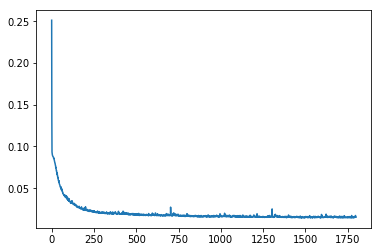

In [785]:
plt.plot(val_cost_2)
plt.show()

In [786]:
val_cost_2.shape

(1800,)

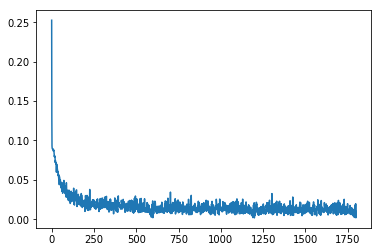

In [787]:
plt.plot(train_cost_2)
plt.show()

In [ ]:
train_cost_2.shape

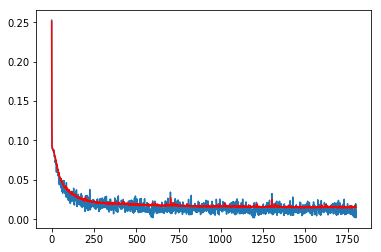

In [791]:
plt.plot(train_cost_2)
plt.plot(val_cost_2,"r")
plt.show()

In [794]:
q=0
e=0
for x,y in zip(x_test,arr_y_test):
    if foward2(x[0],w_e_1_2, w_e_2_2, w_e_3_2, b_e_1_2, b_e_2_2,b_e_3_2)[5].argmax()==y.argmax():
        q+=1
    e+=1
    print(q/e*100)

0.0
0.0
0.0
0.0
0.0
0.0
14.285714285714285
25.0
33.33333333333333
30.0
36.36363636363637
33.33333333333333
38.46153846153847
42.857142857142854
40.0
37.5
35.294117647058826
33.33333333333333
36.84210526315789
40.0
42.857142857142854
45.45454545454545
43.47826086956522
41.66666666666667
44.0
42.30769230769231
40.74074074074074
39.285714285714285
41.37931034482759
40.0
41.935483870967744
43.75
42.42424242424242
44.11764705882353
45.714285714285715
47.22222222222222
48.64864864864865
50.0
48.717948717948715
47.5
48.78048780487805
47.61904761904761
46.51162790697674
47.72727272727273
46.666666666666664
47.82608695652174
46.808510638297875
45.83333333333333
46.93877551020408
46.0
45.09803921568628
46.15384615384615
45.28301886792453
46.2962962962963
45.45454545454545
44.642857142857146
45.614035087719294
46.55172413793103
47.45762711864407
46.666666666666664
45.90163934426229
45.16129032258064
44.44444444444444
43.75
44.61538461538462
43.93939393939394
44.776119402985074
44.11764705882353
4

49.382716049382715
49.48665297741273
49.59016393442623
49.693251533742334
49.59183673469388
49.490835030549896
49.390243902439025
49.49290060851927
49.392712550607285
49.494949494949495
49.395161290322584
49.49698189134809
49.59839357429719
49.69939879759519
49.6
49.50099800399202
49.60159362549801
49.70178926441352
49.60317460317461
49.7029702970297
49.80237154150198
49.70414201183432
49.60629921259843
49.70530451866404
49.6078431372549
49.706457925636
49.8046875
49.902534113060426
50.0
49.90291262135923
50.0
50.09671179883946
50.0
50.09633911368015
50.19230769230769
50.09596928982726
50.0
49.90439770554494
49.80916030534351
49.714285714285715
49.619771863117876
49.71537001897533
49.621212121212125
49.7164461247637
49.81132075471698
49.717514124293785
49.81203007518797
49.906191369606
50.0
49.90654205607476
49.8134328358209
49.72067039106145
49.628252788104085
49.721706864564005
49.629629629629626
49.72273567467653
49.6309963099631
49.53959484346225
49.44852941176471
49.35779816513761

47.84437434279706
47.794117647058826
47.8488982161595
47.79874213836478
47.853403141361255
47.80334728033473
47.7533960292581
47.80793319415449
47.862356621480714
47.91666666666667
47.86680541103018
47.81704781704782
47.767393561786086
47.82157676348548
47.87564766839378
47.9296066252588
47.98345398138573
47.93388429752066
47.8844169246646
47.83505154639175
47.78578784757981
47.73662551440329
47.79033915724563
47.74127310061601
47.794871794871796
47.74590163934426
47.69703172978505
47.648261758691206
47.59959141981614
47.55102040816326
47.60448521916412
47.657841140529534
47.71108850457782
47.66260162601626
47.61421319796954
47.66734279918864
47.61904761904761
47.57085020242915
47.62386248736097
47.67676767676768
47.72956609485368
47.681451612903224
47.73413897280967
47.78672032193159
47.83919597989949
47.791164658634536
47.7432296890672
47.795591182364724
47.74774774774775
47.8
47.75224775224775
47.70459081836327
47.65702891326022
47.70916334661355
47.66169154228856
47.61431411530815


50.14064697609001
50.10541110330288
50.14044943820225
50.175438596491226
50.210378681626935
50.175192711983186
50.14005602240896
50.174947515745274
50.20979020979021
50.24458420684835
50.27932960893855
50.24424284717376
50.2092050209205
50.24390243902439
50.208913649025064
50.17397355601948
50.208623087621696
50.173731758165395
50.208333333333336
50.24288688410826
50.27739251040222
50.242550242550244
50.20775623268698
50.24221453287198
50.27662517289073
50.241879751209396
50.27624309392266
50.24154589371981
50.275862068965516
50.24121295658167
50.20661157024794
50.24088093599449
50.20632737276479
50.24054982817869
50.206043956043956
50.17158544955388
50.13717421124828
50.17135023989033
50.20547945205479
50.171115674195754
50.20519835841313
50.23923444976076
50.27322404371585
50.23890784982935
50.20463847203275
50.23858214042263
50.20435967302453
50.170183798502386
50.204081632653065
50.23793337865398
50.27173913043478
50.23761031907671
50.27137042062415
50.23728813559322
50.20325203252

48.38880084521923
48.416050686378036
48.443271767810025
48.41772151898734
48.39219820769636
48.366701791359326
48.34123222748815
48.368421052631575
48.34297738032615
48.31756046267087
48.29217025748817
48.266806722689076
48.24146981627296
48.216159496327386
48.190875721027794
48.16561844863732
48.19277108433735
48.167539267015705
48.14233385661957
48.11715481171548
48.09200209095661
48.06687565308255
48.04177545691906
48.01670146137787
47.99165362545644
47.96663190823775
47.993746743095365
47.96875
47.99583550234253
48.02289281997919
47.997919916796675
48.024948024948024
48.0
48.0269989615784
48.002075765438505
48.02904564315353
48.055987558320375
48.082901554404145
48.05800103573279
48.033126293995856
48.060010346611485
48.03516028955532
48.06201550387597
48.03719008264463
48.012390294269494
48.03921568627451
48.014440433213
48.04123711340206
48.016486347243685
47.991761071060765
48.01852804940813
48.04526748971193
48.0719794344473
48.047276464542655
48.0225988700565
48.04928131416838

48.35443037974684
48.33403627161535
48.31365935919056
48.3354403708386
48.35720303285594
48.33684210526316
48.358585858585855
48.33824148085822
48.317914213624896
48.29760403530896
48.27731092436975
48.25703485930282
48.27875734676742
48.25849769198489
48.238255033557046
48.21802935010482
48.239731768650465
48.261416003351485
48.24120603015075
48.2628714943491
48.24267782426778
48.264324550397326
48.24414715719064
48.26577517760134
48.28738512949039
48.267223382045934
48.28881469115192
48.26866916979558
48.29024186822352
48.27011254689454
48.25
48.22990420658059
48.2098251457119
48.18976279650437
48.21131447587354
48.19126819126819
48.21280133000832
48.23431657665143
48.214285714285715
48.194271481942714
48.21576763485477
48.19576939029449
48.175787728026535
48.15582262743473
48.13587406793703
48.11594202898551
48.13741721854304
48.15887463798097
48.13895781637717
48.11905746176105
48.14049586776859
48.12061131763734
48.100743187448394
48.08089145687165
48.06105610561056
48.04123711340

48.119507908611595
48.102600140548134
48.120828942746755
48.139044943820224
48.122148122148126
48.10526315789473
48.08839003858295
48.071528751753156
48.089730108657555
48.07288016818501
48.056042031523646
48.07422969187675
48.09240462023101
48.07557732680196
48.05876180482686
48.04195804195805
48.060118839566584
48.07826694619147
48.061473978344395
48.04469273743017
48.02792321116928
48.04605722260991
48.0641785838856
48.04741980474198
48.065528058556986
48.08362369337979
48.06687565308255
48.05013927576602
48.03341454925165
48.05149617258177
48.03478260869565
48.018080667593885
48.001390337156764
48.01945795691452
48.002778742618965
47.986111111111114
48.004165220409575
48.022206800832755
48.04023586541797
48.02357836338419
48.00693240901213
47.99029799029799
47.97367509525459
47.99168975069252
47.97507788161994
47.99307958477509
47.97647872708406
47.994467496542185
47.977877635672314
47.99585348997927
48.01381692573403
47.99723756906077
47.980669658267175
47.99861973775017
48.016557

48.60521528198908
48.590481964231586
48.60606060606061
48.591335958800364
48.576620230163535
48.5921889191644
48.60774818401937
48.6232980332829
48.63883847549909
48.62413063199274
48.639661426844015
48.62496222423693
48.610271903323266
48.59559045605557
48.580917874396135
48.56625415031694
48.58177429088715
48.56711915535445
48.5524728588661
48.56798311727464
48.55334538878843
48.538716480867734
48.52409638554217
48.509485094850945
48.52498494882601
48.510382184772794
48.525872442839955
48.51127819548872
48.526758869512925
48.54223023745116
48.527644230769226
48.543106037849206
48.52852852852853
48.513959771840284
48.529411764705884
48.51485148514851
48.53029394121175
48.51574212893553
48.531175059952034
48.54659874138448
48.53205512282804
48.547469302186286
48.532934131736525
48.51840766237653
48.53381208856972
48.54920729883339
48.5645933014354
48.550074738415546
48.56545128511656
48.550941141320585
48.536439665471924
48.55180650940579
48.53731343283582
48.55267084452402
48.53818615

49.056102100505186
49.069643806485914
49.056603773584904
49.07013815090329
49.08366533864542
49.0971853425385
49.11069816830369
49.124203821656046
49.13770230830459
49.15119363395225
49.138159639352956
49.15164369034994
49.16512059369202
49.15209326974033
49.16556291390729
49.152542372881356
49.13952872650251
49.12652196929592
49.11352209579254
49.12698412698413
49.113991007669924
49.10100475938657
49.08802537668517
49.1014799154334
49.0885072655218
49.07554146856841
49.08898864536573
49.07602956705385
49.08946951702296
49.10290237467018
49.08994988129781
49.10337552742617
49.11679409438439
49.13020558777016
49.143610013175234
49.157007376185454
49.14406110086911
49.13112164296998
49.14451171360884
49.1578947368421
49.171270718232044
49.18463966333509
49.17170654746253
49.1850683491062
49.19842312746386
49.21177088807146
49.19884423430523
49.185924369747895
49.1992648989236
49.186351706036746
49.19968512201522
49.21301154249738
49.20010490427485
49.213424226533824
49.226736566186105
49

49.6920890573188
49.68032204593891
49.69223484848485
49.680473372781066
49.668717463322295
49.680624556423
49.668874172185426
49.680775597067864
49.66903073286052
49.68092649491846
49.66918714555766
49.6574533427829
49.64572508266415
49.65761511216057
49.66949952785647
49.68137833372669
49.669655497876356
49.681528662420384
49.693396226415096
49.70525819382221
49.69354078264969
49.70539712467594
49.693685202639024
49.705535924617195
49.6938294865756
49.70567459383094
49.717514124293785
49.72934808190163
49.741176470588236
49.72947541754881
49.741298212605834
49.72960263343522
49.7179125528914
49.70622796709753
49.69454887218045
49.70636598543575
49.71817754814467
49.72998356421695
49.74178403755868
49.75357897207228
49.7653683716565
49.777152240206426
49.76547842401501
49.777256740914424
49.76558837318331
49.777361143660656
49.765698219306465
49.754040758959945
49.742388758782205
49.75415593537813
49.74250936329588
49.73086824245261
49.74262985493682
49.73099415204678
49.71936389148737

49.11343729972228
49.10294745835113
49.092462096946406
49.08198121263877
49.092849519743865
49.10371318822023
49.11457222103691
49.125426621160415
49.1362763915547
49.12579957356077
49.13664463866979
49.12617220801364
49.115704240357985
49.10524073285045
49.094781682641106
49.08432708688245
49.0738769427294
49.063431247339295
49.05298999787189
49.04255319148936
49.03212082535631
49.02169289663973
49.03253242611099
49.02210884353742
49.01168969181722
49.0012749681258
48.99086466964096
49.00169923534409
48.991293268209816
49.00212314225053
49.012948418594775
49.02376910016978
49.013367281986
49.00296987696224
49.01378579003181
49.00339270568278
48.993004027983886
49.003815175922
48.99343081161263
48.983050847457626
48.99385723363694
49.00465904277848
48.9942832945162
48.98391193903472
48.973544973544975
48.96318239526026
48.95282420139623
48.94247038917089
48.932120955804606
48.92177589852009
48.93257239484253
48.94336432797971
48.9330234523558
48.92268694550063
48.933474128827875
48.923